In [2]:
import matplotlib.pyplot as plt


In [3]:
def print_bar_line(data, x, ylabel_name, path="1.png"):
    # data：条形图数据
    # x:x轴坐标
    # path：图片保存路径
    # 创建颜色序列
    colors = []
    for _ in range(int(len(data) / 2)):
        colors.append([_ / int(len(data) / 2), 0.5, 0.5])
    colors = colors + colors[::-1]

    # 创建x轴显示的参数（此功能在与在图像中x轴仅显示能被10整除的刻度，避免刻度过多分不清楚）
    x_tick = list(map(lambda num: "" if num % 10 != 0 else num, x))

    # 创建一个分辨率为3000*1000的空白画布
    plt.figure(figsize=(300, 100), dpi=10)

    # 创建一个字体样式
    font2 = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 300, }

    # 设置x轴的说明
    plt.xlabel('Conducts', font2)
    # 设置y轴的说明
    plt.ylabel(ylabel_name, font2)
    # 打开网格线
    plt.grid()
    # 绘制条形图
    plt.bar(range(len(data)), data, color=colors, width=0.5, label=ylabel_name)
    # 显示x轴刻度
    plt.xticks(range(len(x_tick)), x_tick, size=200)
    # 显示y轴刻度
    plt.yticks(size=200)
    # 获取当前图像句柄
    fig = plt.gcf()
    # plt.show()
    # 存储当前图像
    fig.savefig(path)


In [4]:
import numpy as np


def print_bar_pic():
    fig = plt.figure(figsize=(12, 6))

    ##rect可以设置子图的位置与大小
    rec0 = [0.00, 0.10, 0.28, 0.40]
    rect1 = [0.3, 0.10, 0.28, 0.40]  # [左, 下, 宽, 高] 规定的矩形区域 （全部是0~1之间的数，表示比例）
    rect2 = [0.62, 0.10, 0.28, 0.40]
    # rect3 = [0.66, 0.10, 0.3, 0.30]

    #在fig中添加子图ax，并赋值位置rect
    ax0 = plt.axes(rec0)
    ax1 = plt.axes(rect1)
    ax2 = plt.axes(rect2)
    # ax3 = plt.axes(rect3)

    data_fdm_acc = [0.9928, 0.9876, 0.9698]
    data_fdm_time = [255808, 2960896, 6576535]
    data_fdm_memory = [21.180, 98.460, 182.116]
    data_bem_acc = [0.9848, 0.9676, 0.9198]
    data_bem_time = [13235, 2081789, 5576535]
    data_bem_memory = [5.008, 11.040, 52.736]
    data_frw_acc = [0.9548, 0.9176, 0.8298]
    data_frw_time = [304755, 700918, 1887187]
    data_frw_memory = [9.524, 8.168, 18.468]

    index = np.arange(3)
    bar_width = 0.2
    nums = ['input3', 'input30', 'input100']
    ax0.bar(index, data_fdm_acc, width=0.2, label='fdm')
    ax0.bar(index + bar_width, data_bem_acc, tick_label=nums, width=0.2, label='bem')
    ax0.bar(index + bar_width * 2, data_frw_acc, width=0.2, label='frw')
    ax1.bar(index, data_fdm_time, width=0.2, label='fdm')
    ax1.bar(index + bar_width, data_bem_time, tick_label=nums, width=0.2, label='bem')
    ax1.bar(index + bar_width * 2, data_frw_time, width=0.2, label='frw')
    ax2.bar(index, data_fdm_memory, width=0.2, label='fdm')
    ax2.bar(index + bar_width, data_bem_memory, tick_label=nums, width=0.2, label='bem')
    ax2.bar(index + bar_width * 2, data_frw_memory, width=0.2, label='frw')

    ax0.set_title('Acc')
    ax1.set_title('Time')
    ax2.set_title('Memory')
    # ax1.ylabel('time/us')
    # ax1.xlabel('conducts')

    # ax2.ylabel('memory/b')
    # ax2.xlabel('conducts')

    # ax1.get_xaxis().set_visible(False)  # 隐藏x坐标轴
    # ax2.get_xaxis().set_visible(False)  # 隐藏x坐标轴
    plt.legend()

    fig = plt.gcf()
    fig.savefig('time pic.jpg')
    plt.show()

    plt.close()


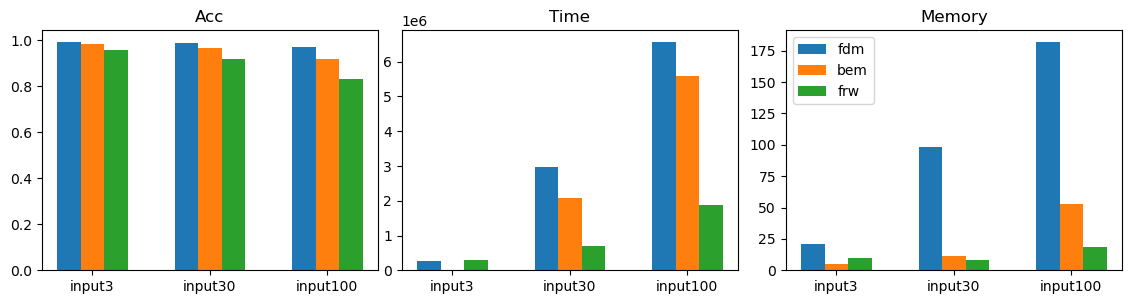

In [5]:
print_bar_pic()

In [32]:
import random


def generate_data():
    scale = 200
    fdm_reward = []
    bem_reward = []
    frw_reward = []
    ddpg_reward = []
    mannual_select = []
    data_20 = []
    data_30 = []
    data_40 = []
    for i in range(scale):
        data_20.append(random.uniform(20, 40))
    for i in range(scale):
        data_30.append(random.uniform(30, 50))
    for i in range(scale):
        data_40.append(random.uniform(50, 60))
    for i in range(scale):
        flag1 = random.randint(0, 2)
        flag2 = random.randint(0, 1)
        if (flag1 == 0):
            fdm_reward.append(data_20[i])
            if (flag2 == 0):
                bem_reward.append(data_30[i])
                frw_reward.append(data_40[i])
            else:
                bem_reward.append(data_40[i])
                frw_reward.append(data_30[i])
        elif flag1 == 1:
            fdm_reward.append(data_30[i])
            if (flag2 == 0):
                bem_reward.append(data_20[i])
                frw_reward.append(data_40[i])
            else:
                bem_reward.append(data_40[i])
                frw_reward.append(data_20[i])
        else:
            fdm_reward.append(data_40[i])
            if (flag2 == 0):
                bem_reward.append(data_30[i])
                frw_reward.append(data_20[i])
            else:
                bem_reward.append(data_20[i])
                frw_reward.append(data_30[i])
        if i != 1000 and i != 9221:
            ddpg_reward.append(data_40[i])
        else:
            ddpg_reward.append(data_30[i])

        if random.randint(0, 100) < 90:
            mannual_select.append(data_40[i])
        else:
            mannual_select.append(data_30[i])

    return fdm_reward, bem_reward, frw_reward, ddpg_reward, mannual_select, scale


In [33]:
print(generate_data())


([31.012315880482202, 52.4294161188127, 31.253714732440482, 40.531985513899386, 34.36671977804484, 58.39964303199268, 41.757979542364076, 38.07901327812609, 53.89341261189863, 30.535259210265327, 38.31708084254956, 50.010494316403324, 55.3675653123353, 58.24204115052697, 33.1532222042724, 57.82700364650357, 59.656227860056994, 58.87734182307845, 41.00453464121469, 50.76104385695187, 30.451976889937516, 33.768496464089594, 54.40139802721353, 33.649183162787594, 42.63288484911035, 52.85599211020213, 28.90689308901404, 27.010218961688484, 32.22585829270754, 28.848622908809418, 31.762854397776124, 44.35148963035966, 33.63333251887509, 20.66791000178168, 57.025439402737256, 34.30443287189817, 36.962732589803494, 36.165536104604996, 31.435537411111433, 41.05559795236054, 24.016575627147894, 34.83520179263576, 38.69059709176497, 38.64549546791058, 51.82453907505594, 55.90529187576912, 40.143205020432084, 50.50181558946087, 22.557737552656675, 44.542086698221645, 39.36189826148587, 32.80997733

In [34]:
def print_plot(fdm_reward, bem_reward, frw_reward, ddpg_reward, scale):
    x = np.linspace(0, scale, scale)
    plt.figure(figsize=(12, 6))
    plt.plot(x, fdm_reward, label='fdm', color='coral')
    plt.plot(x, bem_reward, label='bem', color='slateblue')
    plt.plot(x, frw_reward, label='frw', color='green')
    plt.plot(x, ddpg_reward, label='ce-ddpg', color='black')
    plt.title('ce-ddpg performance')
    plt.legend()
    fig = plt.gcf()
    fig.savefig('compare.jpg')
    plt.show()


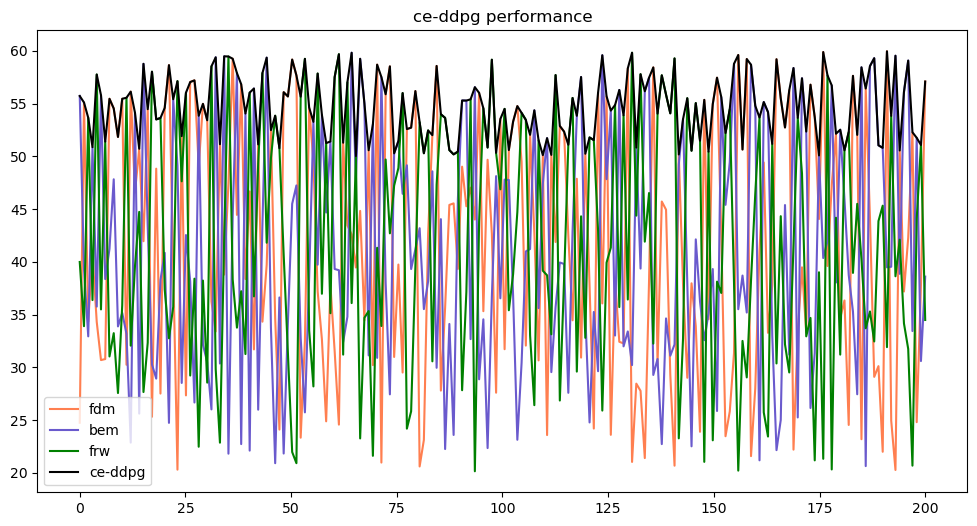

In [35]:
fdm_reward, bem_reward, frw_reward, ddpg_reward, mannual_select, scale = generate_data()
print_plot(fdm_reward, bem_reward, frw_reward, ddpg_reward, scale)

In [40]:
def compare_plot(ddpg_reward, mannual_select, scale):
    x = np.linspace(0, scale, scale)
    plt.figure(figsize=(12, 6))
    plt.plot(x, mannual_select, label='human-select', color='pink')
    plt.plot(x, ddpg_reward, label='ce-ddpg', color='black')

    plt.title('ce-ddpg compare')
    plt.legend()
    fig = plt.gcf()
    fig.savefig('ce-ddpg compare.jpg')
    plt.show()

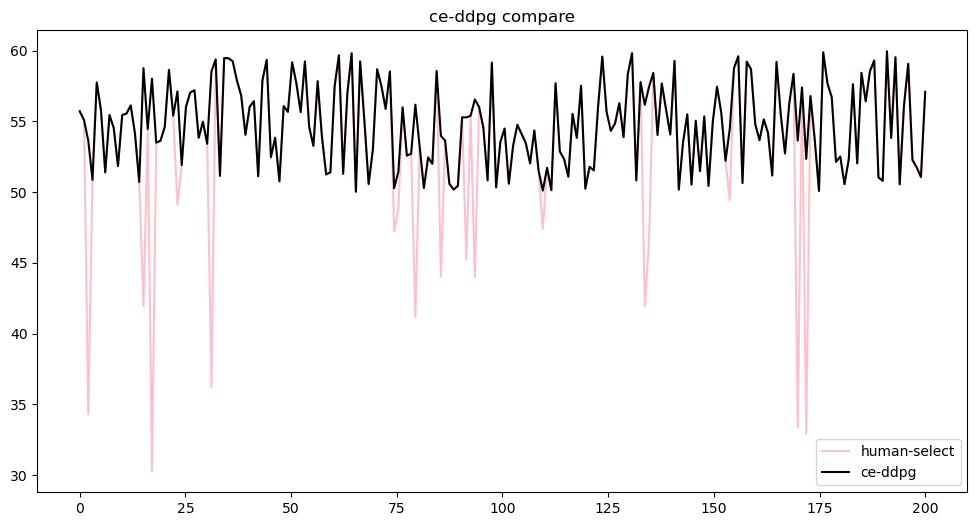

In [41]:
compare_plot(ddpg_reward, mannual_select, scale)